# Dataset Description
## Datasets:
 Arrest_Data_from_2010_to_Present.csv
       dataset  contains 1.31M records and each record consists of 17 features.
       The most interesting features are Arrest date, Time, Area Name, Location,
       Charge Group Code, Arrest Type Code.

 Metro_Bike_Share_Trip_Data.csv
       dataset contains 132k records and each record consists of 16 features.
       The most interesting features are Starting Station Latitude, Starting
       Station Longitude, Ending Station Latitude, Ending Station Longitude.
 Bikelanes.geojson
       map is a set of geospatial data which contains information about bike
       lanes. It is possible to export this data in different formats (KML, KMZ,
       shapefile, json etc).

## Arrest_Data_from_2010_to_Present.csv - Feature Sample:
 * Report ID = 4248313
 * Arrest Date = 02/24/2015
 * Time = 1310
 * Area ID = 20
 * Area Name = Olympic
 * Reporting District = 2022
 * Age = 37
 * Sex Code = M
 * Descent Code = H
 * Charge Group Code = 05
 * Charge Group Description = Burglary
 * Arrest Type Code = F
 * Charge = 459PC
 * Charge Description = BURGLARY
 * Address = 5TH
 * Cross Street = WILTON
 * Location = (34.0653, -118.314)
 
## Metro_Bike_Share_Trip_Data.csv - Feature Sample:
 * Trip ID = 112,531,532
 * Duration = 1,500
 * Start Time = 11/06/2016 02:34:00 PM
 * End Time = 11/06/2016 02:59:00 PM
 * Starting Station ID =
 * Starting Station Latitude =
 * Starting Station Longitude =
 * Ending Station ID = 3,034
 * Ending Station Latitude =34.042061
 * Ending Station Longitude = -118.263382
 * Bike ID = 5,997
 * Plan Duration = 30
 * Trip Route Category = One Way
 * Passholder Type = Monthly Pass
 * Starting Lat-Long =
 * Ending Lat-Long = (34.042061, -118.263382)

# Libraries
This section holds the libraries needed for data analysis and visualisation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import wordcloud
import os

# Configuration
In this section we define variables and constants that are used throughout the whole implementation.

In [2]:
# paths to datasets
arrest_dataset_path = "../data/Arrest_Data_from_2010_to_Present.csv"
trip_dataset_path = "../data/Metro_Bike_Share_Trip_Data.csv"
geolocation_data_path = "../data/Bikelanes.geojson"

# result paths
results_save_path = os.path.abspath("..") + os.path.sep + "data" + os.path.sep + "results" + os.path.sep

# Data Exploration
In this section we read in the datasets and do first exploration of the datasets. The aim is to get an idea about what to do for preprocessing and which knowledge we can extract out of the integrated data.

In [3]:
# read the csv files and geojson
df_arrest = pd.read_csv(arrest_dataset_path, sep=',')
df_trip = pd.read_csv(trip_dataset_path, sep=',')
#df_geo = gpd.read_file(geolocation_data_path)

# quick statistics before feature extraction and data cleaning
print("\n")
print("Datasets before preprocessing:\n")
df_arrest.info()
print("\n\n")
df_trip.info()
print("\n")



Datasets before preprocessing:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313405 entries, 0 to 1313404
Data columns (total 17 columns):
Report ID                   1313405 non-null int64
Arrest Date                 1313405 non-null object
Time                        1313209 non-null float64
Area ID                     1313405 non-null int64
Area Name                   1313405 non-null object
Reporting District          1313405 non-null int64
Age                         1313405 non-null int64
Sex Code                    1313405 non-null object
Descent Code                1313405 non-null object
Charge Group Code           1225010 non-null float64
Charge Group Description    1224486 non-null object
Arrest Type Code            1313405 non-null object
Charge                      1313405 non-null object
Charge Description          1225060 non-null object
Address                     1313405 non-null object
Cross Street                749250 non-null object
Location                

# Important Features
## Arrest Dataset
As we want to provide an analysis which claims save tracks to ride the bike in Los Angeles features that describe the location and the type of the commited crime are of high importance. Furthermore, the date and time of arrest could be interesting to extract a trend from the data.

### Data Cleaning
First of all we have a look at the previously printed information about the dataset, especially at the potential very important features. We can see that the maximum number of present values per column is 1.313.405. It is very important for us to decide which columns are very important. The columns of interest of this dataset are 
 * Arrest Date
 * Time
 * Area Name
 * Age
 * Sex Code
 * Descent Code
 * Charge Group Description
 * Charge Description
 * Address
 * Cross Street
 * Location
 
In the next step we need to decide how to deal with missing values. As the location information is fully present, we need to deal with the charges. As there are not to many missing values we drop rows with missing charge or time information. Missing values for 'Cross Street' get replaced with 'Unknown' as there are way too many missing values as to drop them. This information can be used additionally to concretize the location if it is present.
After data clearning of the Arrest Dataset there are 1.224.486 rows still present, which means a loss of 88.919‬ rows.

## Metro Bike Share Dataset
The aim of this dataset is to provide information about bike trips of users that use the shared metro bikes of Los Angeles. Therefore, it is important between which stations they traveled and how long it took them to ride their bike.

### Data Cleaning
As for the previous dataset we have to decide which of the provided features are really important for our analysis. We can further obtain that the maximum number of present values per column is 132.427. We decided that the following ones provide valueable information:
 * Start Time
 * End Time
 * Starting Station ID
 * Starting Station Latitude
 * Starting Station Longitude
 * Ending Station ID
 * Ending Station Latitude
 * Ending Station Longitude
 * Trip Route Category
 
As locational data is of importance in this dataset, we have to drop columns with missing locational data. Therefore, we need to drop all rows with missing values withing the columns 'Ending Station Latitude' and  'Starting Station Latitude'. After dropping those such row we have 131.336 remaining rows in our dataframe which is a loss of 1.091 rows.

In [4]:
###################################################################################
# Data preprocessing
###################################################################################
# extract columns that we need for analysis
arrest_cols = ['Arrest Date', 'Time', 'Area Name', 'Age', 'Sex Code', 'Descent Code', 'Charge Group Description',
               'Charge Description', 'Address', 'Cross Street', 'Location']
trip_cols = ['Start Time', 'End Time', 'Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude',
             'Ending Station ID', 'Ending Station Latitude', 'Ending Station Longitude', 'Trip Route Category']
df_arrest = df_arrest[arrest_cols]
df_trip = df_trip[trip_cols]

# multiply time float value by 100 for later conversion
df_arrest['Time'] = df_arrest['Time'] * 100

# drop rows according to missing values in important columns
df_arrest = df_arrest.dropna(subset=['Charge Group Description'])
df_arrest = df_arrest.dropna(subset=['Charge Description'])
df_arrest = df_arrest.dropna(subset=['Time'])
df_trip = df_trip.dropna(subset=['Ending Station Latitude', 'Starting Station Latitude'])

# replace missing information of Cross Street with unknown
df_arrest['Cross Street'].fillna('Unknown', inplace=True)

# format Time in hour:minutes:second format
df_arrest['Time'] = pd.to_datetime(df_arrest['Time'], unit='m').dt.strftime('%H:%M:%S')

# convert the given dates into date formated data
df_arrest['Arrest Date'] = df_arrest['Arrest Date'] + ' ' + df_arrest['Time']
df_arrest['Arrest Date'] = pd.to_datetime(df_arrest['Arrest Date'])
df_arrest = df_arrest.drop('Time', axis=1)

# index the arrest data by Arrest Date 
df_arrest.index = pd.DatetimeIndex(df_arrest['Arrest Date'])

# quick summary of the data after preprocessing
print("\n")
print("Datasets after preprocessing:\n")
df_arrest.info()
print("\n\n")
df_trip.info()
print("\n")

df_arrest.head(10)




Datasets after preprocessing:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1224346 entries, 2015-02-24 23:20:00 to 2019-04-27 07:00:00
Data columns (total 10 columns):
Arrest Date                 1224346 non-null datetime64[ns]
Area Name                   1224346 non-null object
Age                         1224346 non-null int64
Sex Code                    1224346 non-null object
Descent Code                1224346 non-null object
Charge Group Description    1224346 non-null object
Charge Description          1224346 non-null object
Address                     1224346 non-null object
Cross Street                1224346 non-null object
Location                    1224346 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 102.8+ MB



<class 'pandas.core.frame.DataFrame'>
Int64Index: 131336 entries, 25 to 132426
Data columns (total 9 columns):
Start Time                    131336 non-null object
End Time                      131336 non-null object
Sta

,Arrest Date,Area Name,Age,Sex Code,Descent Code,Charge Group Description,Charge Description,Address,Cross Street,Location
Arrest Date,,,,,,,,,,
2015-02-24 23:20:00,2015-02-24 23:20:00,Olympic,37,M,H,Burglary,BURGLARY,5TH,WILTON,"(34.0653, -118.314)"
2015-02-26 14:00:00,2015-02-26 14:00:00,Mission,22,M,H,Larceny,SHOPLIFTING,8300 VAN NUYS BL,Unknown,"(34.2216, -118.4488)"
2019-04-29 05:20:00,2019-04-29 05:20:00,West LA,41,M,H,Robbery,ROBBERY,11600 WILSHIRE BL,Unknown,"(34.0508, -118.4592)"
2019-04-30 17:00:00,2019-04-30 17:00:00,Hollywood,27,M,O,Burglary,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
2015-02-28 07:20:00,2015-02-28 07:20:00,Southeast,22,M,B,Burglary,BURGLARY,103RD,HICKORY,"(33.947, -118.2594)"
2015-02-28 02:20:00,2015-02-28 02:20:00,West Valley,16,M,H,Robbery,ROBBERY,VANOWEN,WOODLEY,"(34.1939, -118.4836)"
2019-05-01 18:00:00,2019-05-01 18:00:00,77th Street,28,F,B,Robbery,ROBBERY,VERMONT,FLORENCE,"(33.9746, -118.2918)"
2015-03-01 15:20:00,2015-03-01 15:20:00,Devonshire,22,M,H,Other Assaults,BATTERY ON PERSON,VANALDEN,BRYANT,"(34.2251, -118.5372)"
2019-05-02 13:20:00,2019-05-02 13:20:00,Pacific,58,M,B,Burglary,BURGLARY,ROSE,FREDERICK,"(34.0027, -118.4653)"


# Functions used for Data Processing and Visualisation
The following functions are used to process the given dataframes and to visualize the results of data processing.

In [5]:
def generate_wordcloud(df_data, column):
    # get list of words
    column_elems = "".join(desc for desc in df_data[column])

    # establish the wordclouds
    elems_wc = wordcloud.WordCloud().generate(column_elems)
    plt.figure(figsize=[10, 10])
    plt.imshow(elems_wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(results_save_path + "wordcloud_" + column.replace(" ", "_") + ".png", format='png')


def generate_histogram(name, bin_color, x, y, data, xlabel, ylabel):
    sb.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(30, 15))
    sb.set_color_codes("pastel")
    sb.barplot(x=x, y=y, data=data, label="Total", color=bin_color)
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    sb.despine(left=True, bottom=True)
    plt.savefig(results_save_path + "histogram_" + name.replace(" ", "_") + ".png", format='png')


def generate_df_count(df_data, column):
    df_count = pd.DataFrame(df_data.groupby(column)\
                                          .size()
                                          .sort_values(ascending=False)\
                                          .rename('Counts')
                                          .reset_index())
    return df_count


# Data Processing
The following section deals with extracting valueable information and patterns from each dataset and is used to explore the data and to state what are important points before integrating the datasets and analyszing them together.

## Arrest Dataset
In the following section we analyze data concering the Arrest Dataset. We extract pattern about frequently commited crimes that can affect the bikers. Futhermore, we need to find the hotspots where those crimes have most fequently been committed.

### Charge and Charge Group
It is important for our analysis to extract information about the types of commited crimes in order to decide if thoses crimes might affect people who ride their bikes along a certain lane. 
In the following we analyze the Charge and Charge Group Description in order to find the most frequently commited crimes. Having this information, we need to decide whether a certain crime might affect bikers or not.

#### Listing the Top 10 Charges
The following snippet lists the top 50 Charges and Charge Groups that occur in the dataset.

In [6]:
# most frequently committed crimes - tables
df_charge_desc_count = generate_df_count(df_arrest, 'Charge Description')
df_charge_desc_count.shape


(2319, 2)

In [7]:
df_charge_desc_count.head(50)

,Charge Description,Counts
0,DRUNK DRIVING ALCOHOL/DRUGS,97810
1,DRINKING IN PUBLIC,93662
2,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,46663
3,POSSESSION CONTROLLED SUBSTANCE,45100
4,FTA AFTER WRITTEN PROMISE,31548
5,POSSESSION NARCOTIC CONTROLLED SUBSTANCE,29355
6,PROSTITUTION,26740
7,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,26011
8,SIT/LIE/SLEEP SIDEWALK OR STREET,25715
9,LOS ANGELES MUNICIPAL CODE,24652


In [8]:
df_charge_group_desc_count = generate_df_count(df_arrest, 'Charge Group Description')
df_charge_group_desc_count.shape


(27, 2)

In [9]:
df_charge_group_desc_count.head(50)

,Charge Group Description,Counts
0,Miscellaneous Other Violations,243148
1,Narcotic Drug Laws,162724
2,Driving Under Influence,120466
3,Drunkeness,115606
4,Aggravated Assault,86029
5,Larceny,70466
6,Other Assaults,63228
7,Moving Traffic Violations,53330
8,Liquor Laws,51772
9,Prostitution/Allied,39288


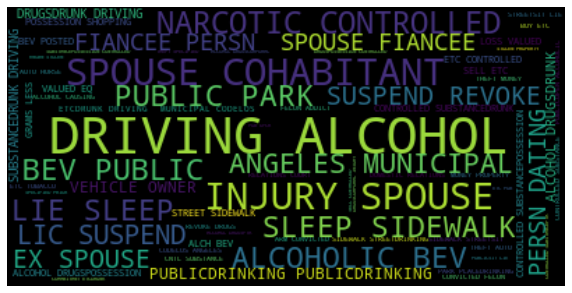

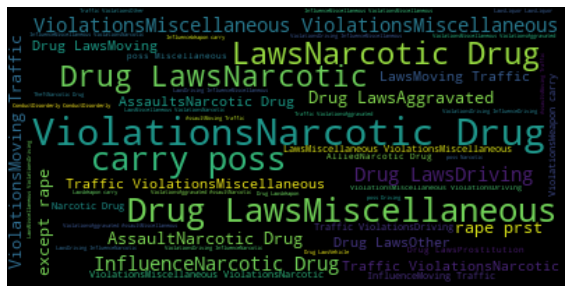

In [10]:
# most frequently committed crimes - wordcount
generate_wordcloud(df_arrest, 'Charge Description')
generate_wordcloud(df_arrest, 'Charge Group Description')

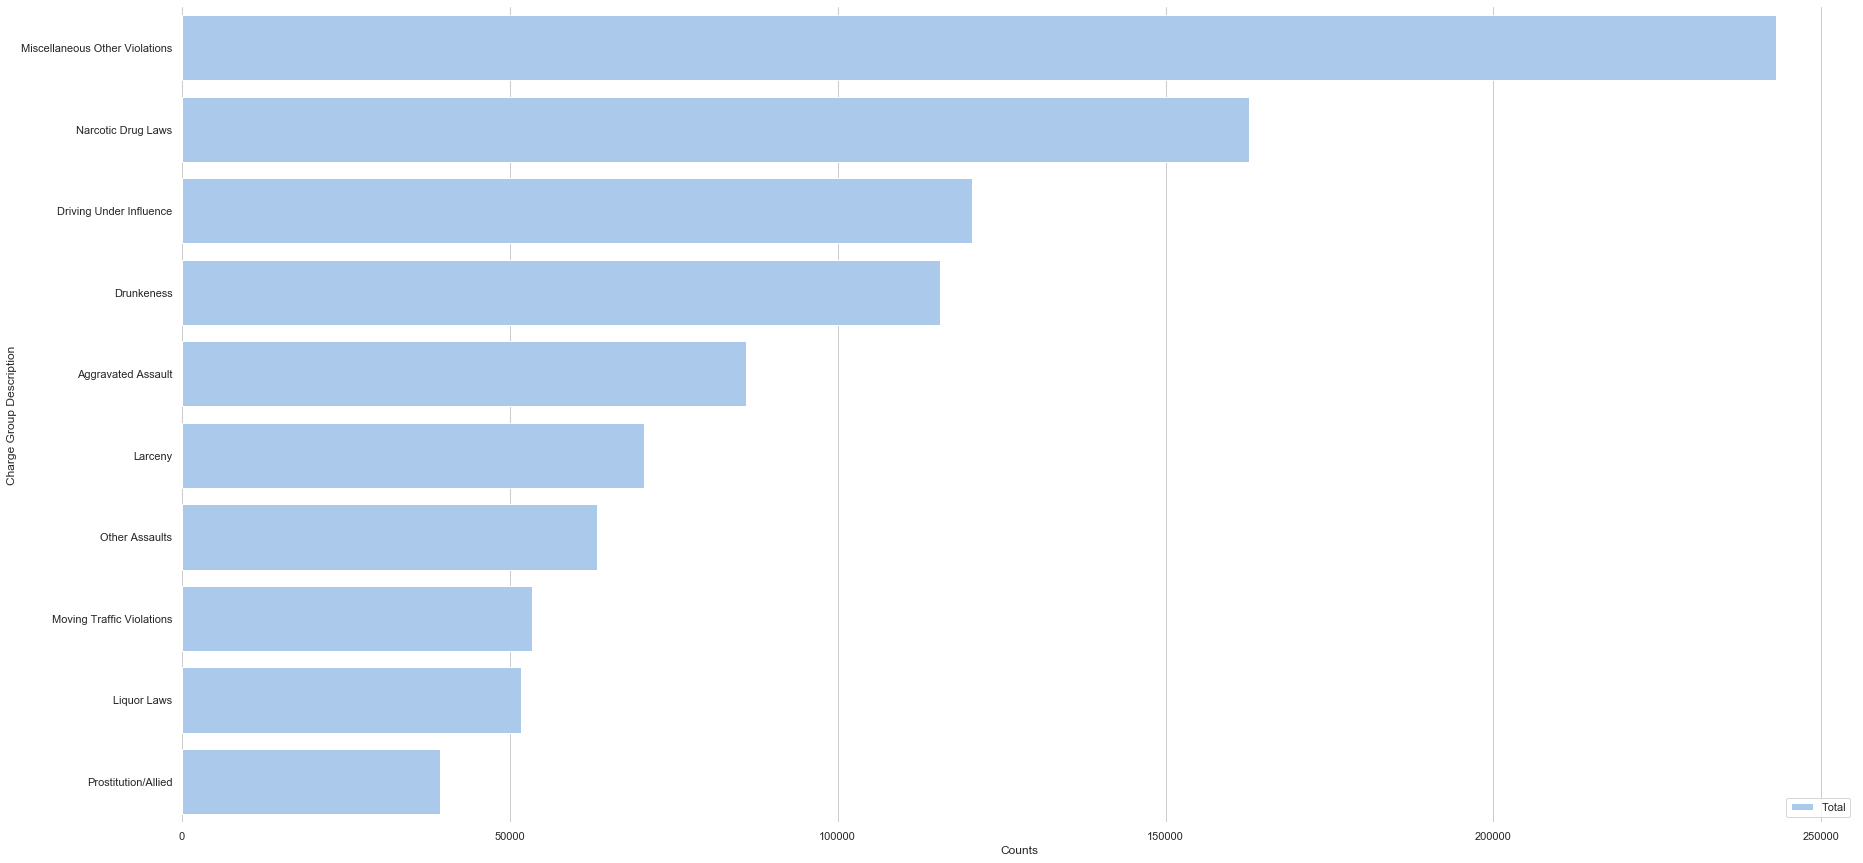

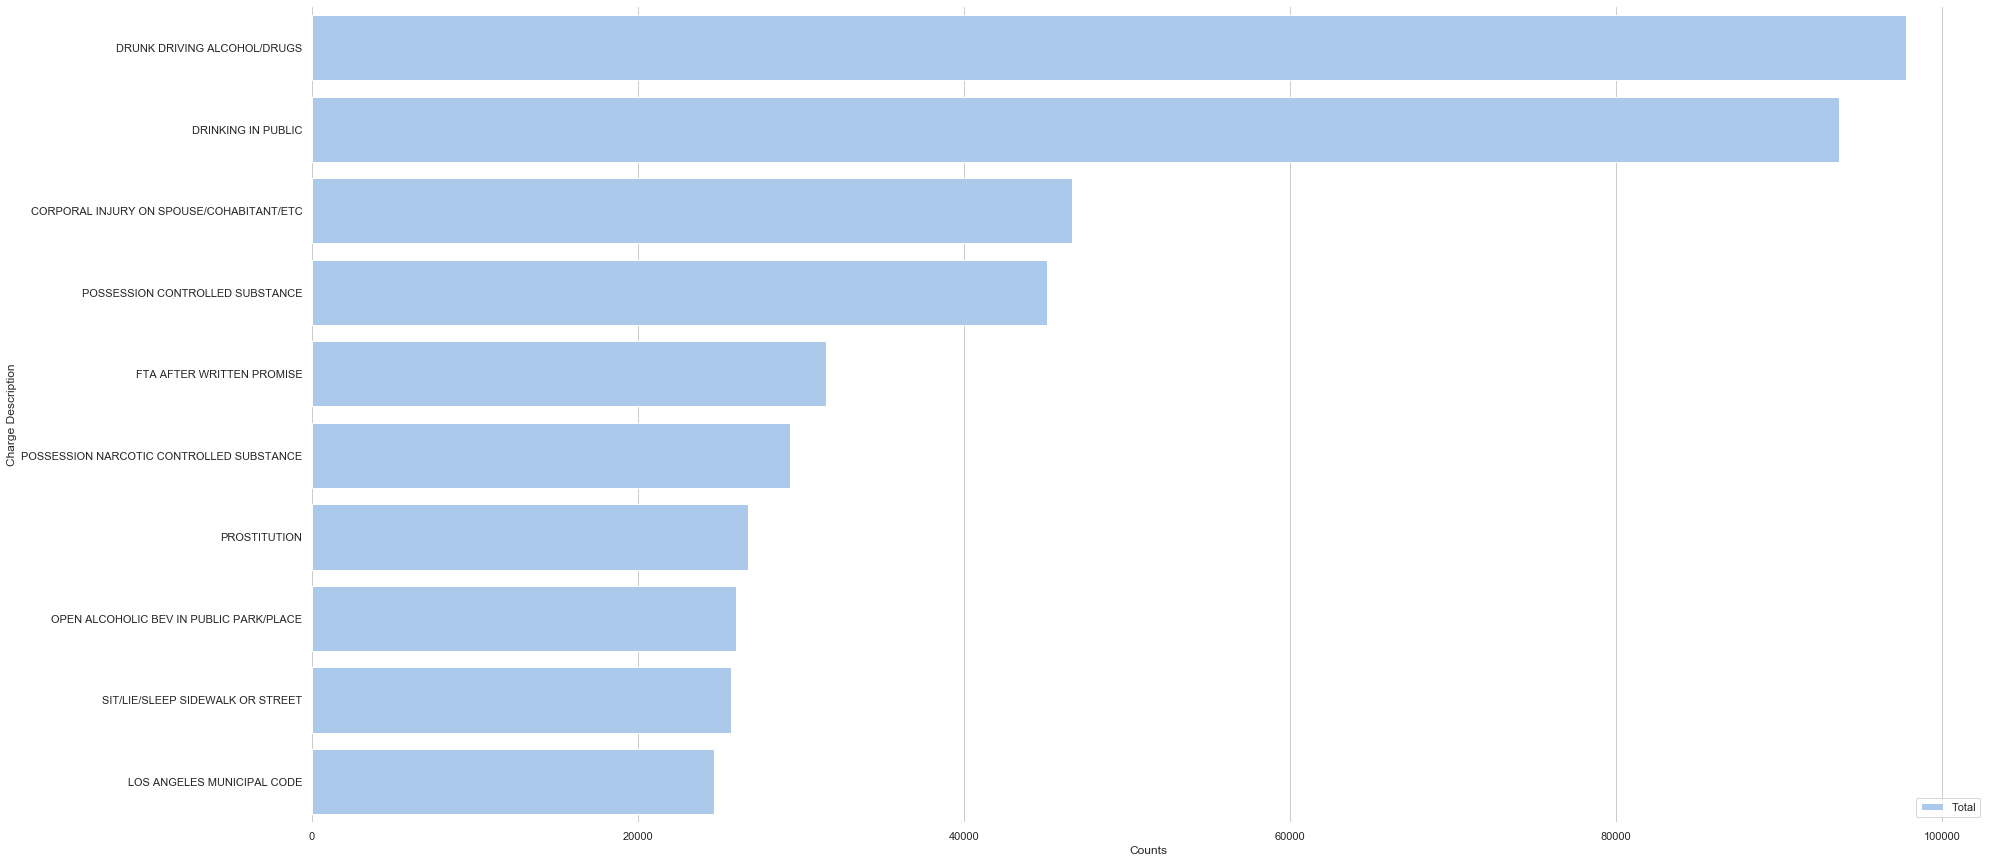

In [11]:
generate_histogram('Charge Group Description', 'b', 'Counts', 'Charge Group Description',
                   df_charge_group_desc_count.iloc[:10, :], 'Counts', 'Charge Group Description')
generate_histogram('Charge Description', 'b', 'Counts', 'Charge Description', df_charge_desc_count.iloc[:10, :],
                   'Counts', 'Charge Description')

#### Crimes Result
The Charge Description column supplies 2319 different types of charges which belong to 27 different groups which are given in the Charge Group Description column. Now it is important to find Charges/Crimes that can directly affect the safety of bikers that are driving through Los Angeles in general (without consideration of certain locations and bike lanes first). Among all the listed Charges we consider the following one as important as they can have a major impact in the bikers safety.
 * DRUNK DRIVING ALCOHOL/DRUGS
 * DRINKING IN PUBLIC 
 * OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE
 * SIT/LIE/SLEEP SIDEWALK OR STREET
 * ROBBERY
 * TAKE VEHICLE W/O OWNER'S CONSENT
 * FTA/TRAFFIC WARRANT
 * DRIVE W/LIC SUSPEND/REVOKE 4 OTHER REASON
 * DRINKING ALCOHOL
 * DRINKING IN PUBLIC***
 * VANDALISM W/LOSS VALUED EQ OR > \\$400
 * DRIVE W/LIC SUSPEND/REVOKE 4 DRUGS/ALCOHL
 * GRAND THEFT MONEY/PROPERTY > \\$400
 * UNLICENSED DRIVER
 * DRUNK DRIVING .10 OR ABOVE
 * VANDALISM
 * DUI ALCOHOL CAUSING INJURY
 
The listing shows a depiction of crimes that can harm bikers around Los Angeles. Those charges were picked from the top 50 most frequently commited crimes of the arrest dataset. As we can see drunkenness and different kind of violations while driving a vehicle are very common and can affect the bikers safety in a very bad way.

#### Extraction of harming crimes
As not all of the listed crimes will harness the bikers, we need to extract the important ones. This is done in the following.

In [12]:
# get list of charges
charges = df_charge_desc_count['Charge Description'].tolist()
print(len(charges))

2319


As we deal with 2319 different charges we have to sort out those which does not dirrectly harm bikers on their lanes. Therefore, we have a look at the Top 50 most frequently occurring charges and extract words that correspond to the impact on bikers (e.g. DRIVING, DRUNKEN, VANDALISM, etc.). Using this substring approach we try to extract related crimes that haven't happened as frequently yet, but can still harm bikers in the same way.

In [13]:
# get lists constaining interesting charges due to the harming ones withing the top 50
drunk_sub = [s for s in charges if 'DRUNK' in s]
drinking_sub = [s for s in charges if 'DRINKING' in s]
driving_sub = [s for s in charges if 'DRIVING' in s]
drive_sub = [s for s in charges if 'DRIVE' in s]
alcohol_sub = [s for s in charges if 'ALCOHOL' in s]
sidewalk_sub = [s for s in charges if 'SIDEWALK' in s]
street_sub = [s for s in charges if 'STREET' in s]
robbery_sub = [s for s in charges if 'ROBBERY' in s]
vehicle_sub = [s for s in charges if 'VEHICLE' in s]
vandalism_sub = [s for s in charges if 'VANDALISM' in s]
theft_sub = [s for s in charges if 'THEFT' in s]
gun_sub = [s for s in charges if 'GUN' in s]

sub_charges = [drunk_sub, drinking_sub, driving_sub, drive_sub, alcohol_sub, sidewalk_sub, street_sub, robbery_sub,
               vehicle_sub, vandalism_sub, theft_sub, gun_sub]

# build the intersection of those list of charges
interesting_charges = sub_charges[0]
for sub in sub_charges:
    interesting_charges = list(set(interesting_charges) | set(sub))

print(len(interesting_charges))

289


After extracting the main types of crimes bikers have to be concerned about, only 289 charge types out of 2319 are remaining. In the next step we extract those entries from the arrest dataframe to get the data we have to take care of.

In [15]:
df_arrest_interesting_charges = df_arrest[df_arrest['Charge Description'].isin(interesting_charges)]
df_arrest_interesting_charges.index = pd.DatetimeIndex(df_arrest_interesting_charges['Arrest Date'])
df_arrest_interesting_charges.head(10)

,Arrest Date,Area Name,Age,Sex Code,Descent Code,Charge Group Description,Charge Description,Address,Cross Street,Location
Arrest Date,,,,,,,,,,
2019-04-29 05:20:00,2019-04-29 05:20:00,West LA,41,M,H,Robbery,ROBBERY,11600 WILSHIRE BL,Unknown,"(34.0508, -118.4592)"
2015-02-28 02:20:00,2015-02-28 02:20:00,West Valley,16,M,H,Robbery,ROBBERY,VANOWEN,WOODLEY,"(34.1939, -118.4836)"
2019-05-01 18:00:00,2019-05-01 18:00:00,77th Street,28,F,B,Robbery,ROBBERY,VERMONT,FLORENCE,"(33.9746, -118.2918)"
2015-03-02 18:00:00,2015-03-02 18:00:00,Central,34,M,H,Robbery,ROBBERY,700 S BROADWAY,Unknown,"(34.0452, -118.2534)"
2019-04-26 12:20:00,2019-04-26 12:20:00,Central,57,M,H,Drunkeness,DRINKING IN PUBLIC,6TH,HILL,"(34.0481, -118.2542)"
2019-04-27 19:40:00,2019-04-27 19:40:00,Central,35,M,H,Liquor Laws,DRINKING ALCOHOL*******,7TH,FLOWER,"(34.0438, -118.2547)"
2019-04-22 22:20:00,2019-04-22 22:20:00,Rampart,20,M,H,Liquor Laws,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,2200 W 6TH ST,Unknown,"(34.0601, -118.2761)"
2019-04-22 22:20:00,2019-04-22 22:20:00,Rampart,21,M,H,Liquor Laws,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,2200 W 6TH ST,Unknown,"(34.0601, -118.2761)"
2019-04-23 20:00:00,2019-04-23 20:00:00,Rampart,54,M,B,Liquor Laws,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,2200 W 6TH ST,Unknown,"(34.0601, -118.2761)"


In [16]:
# print number of data points that are of interest for our analysis
print(len(df_arrest_interesting_charges))

472801


In [17]:
# print the fraction of still remaining arrests
print(str((len(df_arrest_interesting_charges)/len(df_arrest))*100) + '% of arrest data entries of interest!')

38.61661654466956% of arrest data entries of interest!


After performing proper filtering on our arrest data set there are 472801 commited crimes/arrests out of the initial 1224346 still remaining. Another interpretation of this number is that around 38.62% of the data in the arrest dataset are about crimes/charges that are of interest to our analysis task.

#### Evaluation of frequent Locations (Area Name and Address)
In this subsection we focus on visualizing the areas and addresses in which crime were/are comitted frequently. This should give a first insight in problematic areas in Los Angeles and should help us to further understand the locational properties of the data. 
In the first step we analyse the Area Name and Address feature using a wordcloud as already done for Charge Description and Charge Group Description. 

Note: starting from here, we already focus on the charges of interest instead of the whole dataset.

In [18]:
# build dataframe that counts the occurrence of certain area names within the data of interest
df_area_name_count = generate_df_count(df_arrest_interesting_charges, 'Area Name')
df_area_name_count.shape

(21, 2)

In [19]:
df_area_name_count.head(21)

,Area Name,Counts
0,Central,51478
1,Hollywood,48448
2,Pacific,31341
3,Newton,27273
4,N Hollywood,25258
5,Southwest,25066
6,Van Nuys,24576
7,Rampart,23260
8,77th Street,22161
9,Northeast,21760


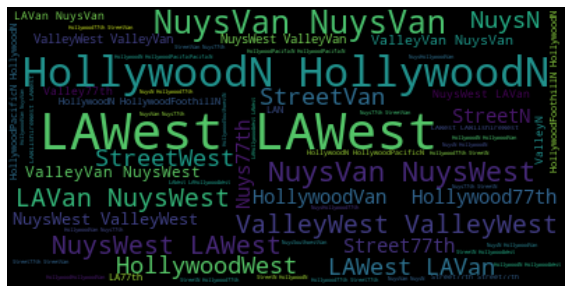

In [20]:
# wordcloud that shows the most common area names
generate_wordcloud(df_arrest_interesting_charges, 'Area Name')

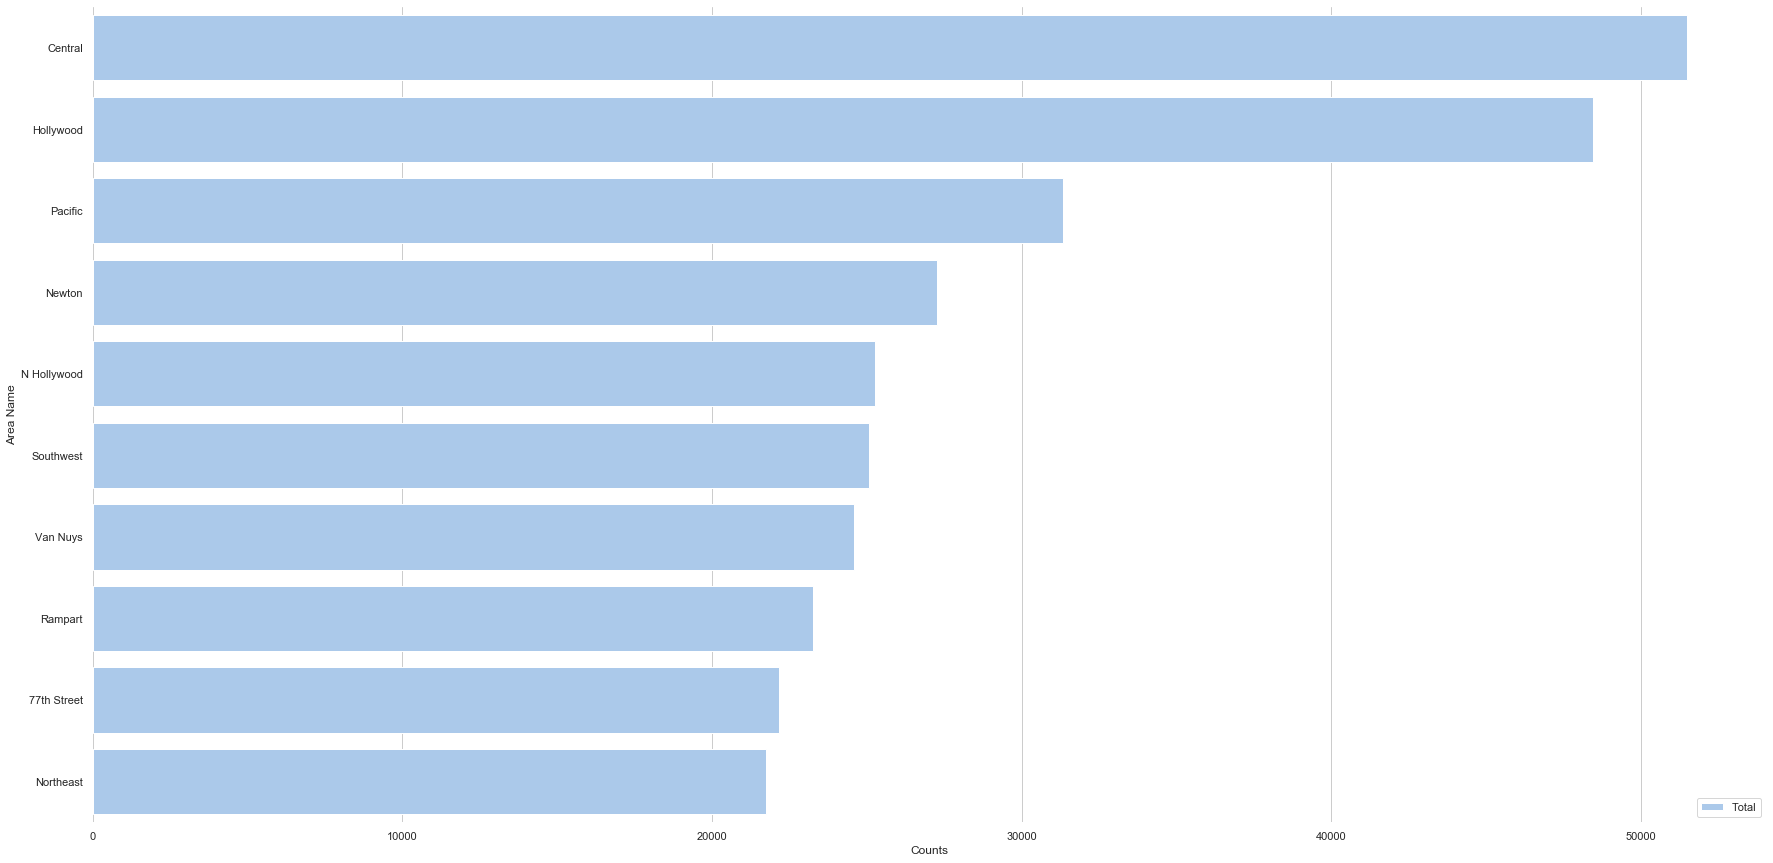

In [21]:
# histogram for the top 10 area names
generate_histogram('Area Name', 'b', 'Counts', 'Area Name',
                   df_area_name_count.iloc[:10, :], 'Counts', 'Area Name')

In [22]:
# build dataframe that counts the occurrence of certain area names within the data of interest
df_address_count = generate_df_count(df_arrest_interesting_charges, 'Address')
df_address_count.shape

(40450, 2)

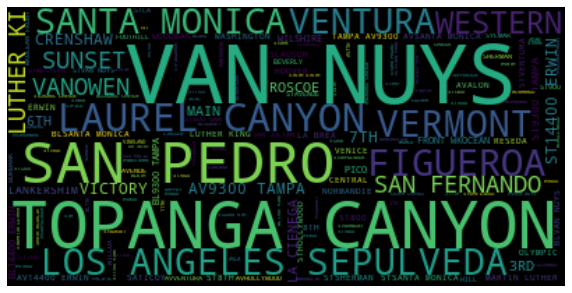

In [23]:
# wordcloud that shows the most common addresses
generate_wordcloud(df_arrest_interesting_charges, 'Address')

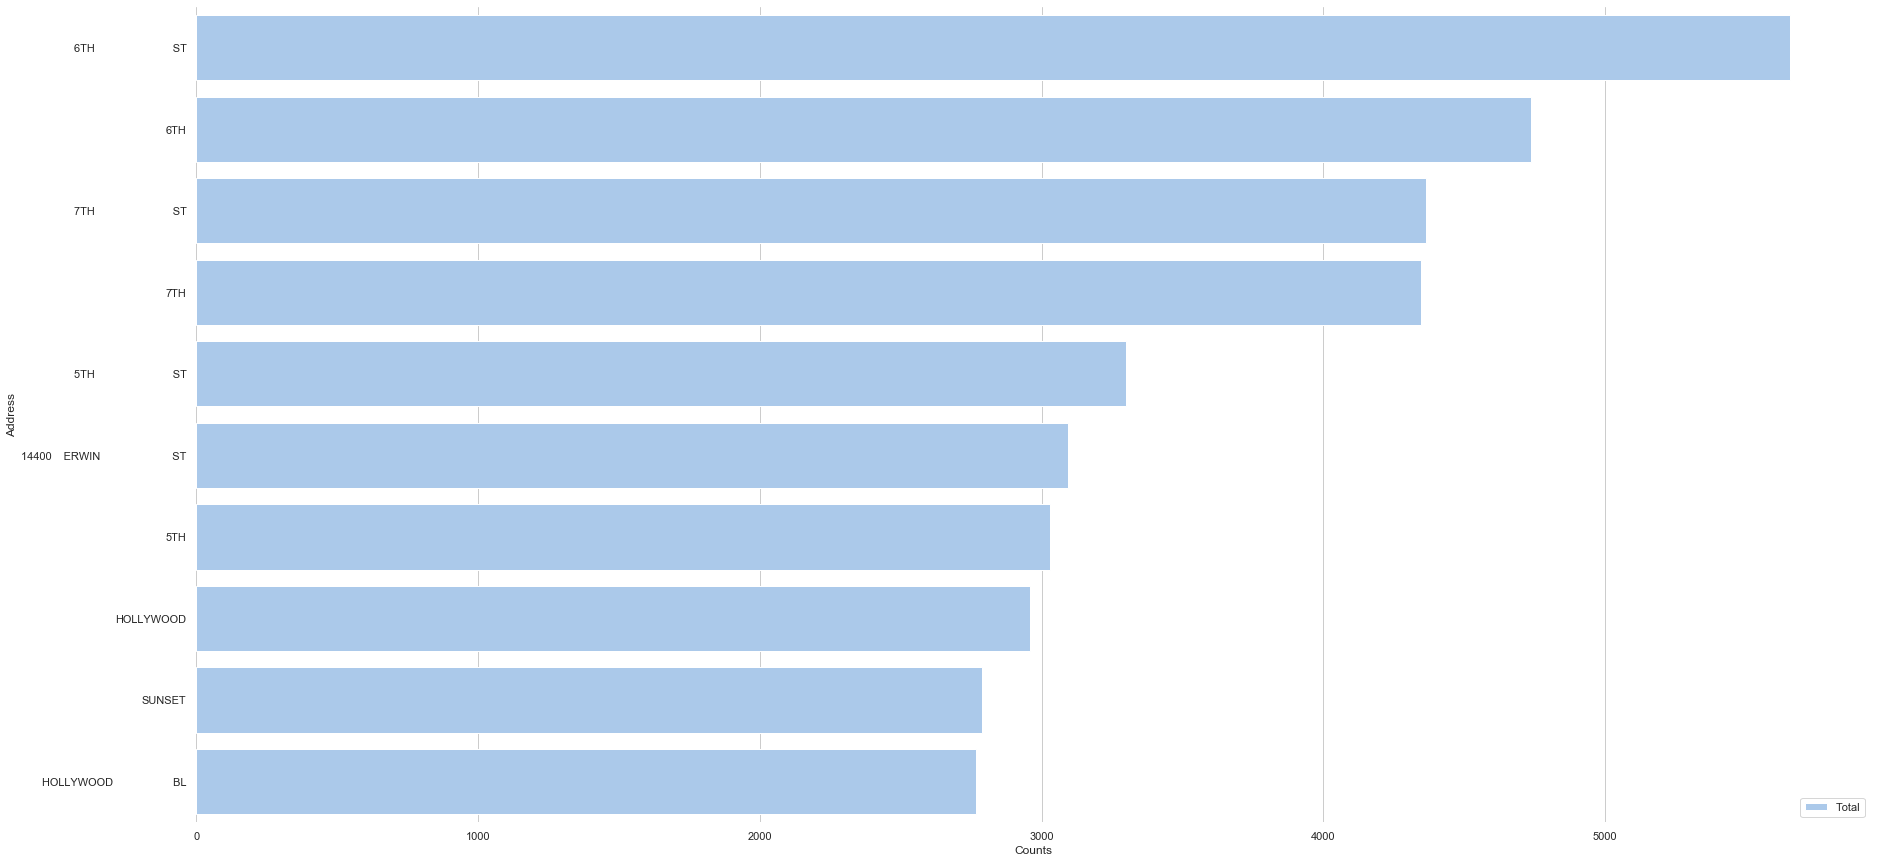

In [24]:
# histogram for the top 10 addresses
generate_histogram('Address', 'b', 'Counts', 'Address',
                   df_address_count.iloc[:10, :], 'Counts', 'Address')

This analysis of Area Names and Addresses reveals that there are 21 different areas and 40450 different addresses to consider when it comes to specification of commited crimes withing the charges we are interesting in this analysis.
Moreover, the Wordcloud and Histograms give a glimpse look into the centers of crimes corresponding to our charges of interest. Based on the extracted data, we will late consider certain areas as more or less dangerous for bikers.

#### Analyse Evolution of Crimes
In the following section we focus on analysis of the evolution of crimes over the past years/months. The main focus of this is to gain information about the time distribution of crimes. Are there any patterns if in certain times of the year less crimes are committed?

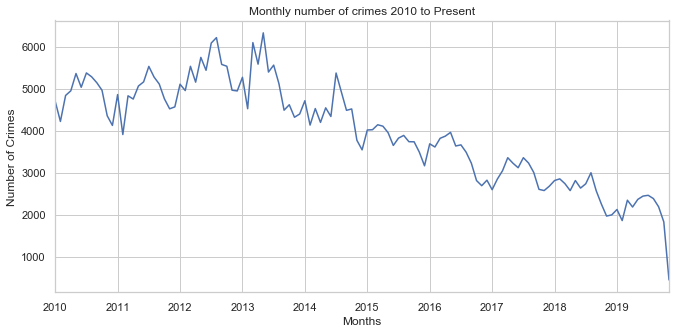

In [25]:
# resample per months and display the corresponding count graph
plt.figure(figsize=(11,5))
df_arrest_interesting_charges.resample('M').size().plot(legend=False)
plt.title('Monthly number of crimes 2010 to Present')
plt.ylabel('Number of Crimes')
plt.xlabel('Months')
plt.savefig(results_save_path + "graph_crimes_per_month.png", format='png')